In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("survey_results_public.csv")

In [3]:
print("data shape:", data.shape)
data.head()

data shape: (64461, 61)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
sorted(data.columns)

['Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'Hobbyist',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MainBranch',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Respondent',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'Sexuality',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

## Selecting columns that will be needed for this analysis and prediction of salary

In [6]:
df = data[['Age', 'Age1stCode', 'ConvertedComp', 'Country', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 
           'Ethnicity', 'Gender', 'Hobbyist', 'LanguageWorkedWith', 'MainBranch', 'MiscTechWorkedWith', 
           'NEWCollabToolsWorkedWith', 'NEWEdImpt', 'NEWJobHunt', 'NEWLearn', 'OpSys', 'OrgSize', 'UndergradMajor', 
           'WebframeWorkedWith', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       45446 non-null  float64
 1   Age1stCode                57900 non-null  object 
 2   ConvertedComp             34756 non-null  float64
 3   Country                   64072 non-null  object 
 4   DatabaseWorkedWith        49537 non-null  object 
 5   DevType                   49370 non-null  object 
 6   EdLevel                   57431 non-null  object 
 7   Employment                63854 non-null  object 
 8   Ethnicity                 45948 non-null  object 
 9   Gender                    50557 non-null  object 
 10  Hobbyist                  64416 non-null  object 
 11  LanguageWorkedWith        57378 non-null  object 
 12  MainBranch                64162 non-null  object 
 13  MiscTechWorkedWith        40314 non-null  object 
 14  NEWCol

### My target variable "ConvertedComp" has a lot of missing values so I'll be dropping the mising values and their corresponding rows across the dataset

In [8]:
df.dropna(subset=['ConvertedComp'], inplace=True)
print('df shape:', df.shape)

df shape: (34756, 25)


### The number of columns have reduced to 34756 from 64461

# Data Preprocessing and Exploration

## Converting object data to numeric data

In [9]:
df['Age1stCode'] = pd.to_numeric(df['Age1stCode'], errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

## Checking columns with high cardinality 

In [10]:
df.select_dtypes('object').nunique()

Country                      159
DatabaseWorkedWith          2334
DevType                     6155
EdLevel                        9
Employment                     3
Ethnicity                    147
Gender                         7
Hobbyist                       2
LanguageWorkedWith          9370
MainBranch                     2
MiscTechWorkedWith          1935
NEWCollabToolsWorkedWith     999
NEWEdImpt                      5
NEWJobHunt                  2029
NEWLearn                       4
OpSys                          4
OrgSize                        9
UndergradMajor                12
WebframeWorkedWith          2932
dtype: int64

### We can see the presence of high cardinality in some of the chosen columns but since they are important in predicting salary of respondents, I'll will be creating a function that will only take the top 10 values while grouping the remaining values as others

## Working with Country

In [11]:
top_countries = df['Country'].value_counts().head(10)
top_countries

United States     8152
India             2668
United Kingdom    2588
Germany           2311
Canada            1345
Brazil            1157
France            1127
Netherlands        810
Poland             798
Australia          772
Name: Country, dtype: int64

In [12]:
def country_label(top):
    country = top.Country
    if country=='United States':
        return 'United States'
    elif country=='India':
        return 'India'
    elif country=='United Kingdom':
        return 'United Kingdom'
    elif country=='Germany':
        return 'Germany'
    elif country=='Canada':
        return 'Canada'
    elif country=='Brazil':
        return 'Brazil'
    elif country=='France':
        return 'France'
    elif country=='Netherlands':
        return 'Netherlands'
    elif country=='Poland':
        return 'Poland'
    elif country=='Australia':
        return 'Australia'
    else: 
        return 'Others'

In [13]:
df['Countries'] = df.apply(country_label, axis=1)

In [14]:
df['Countries'].nunique()

11

## Checking DatabaseWorkedWith

### Checking the values in DatabaseWorkedWith

In [15]:
df['DatabaseWorkedWith'].value_counts()

Microsoft SQL Server                                          2278
MySQL                                                         1673
PostgreSQL                                                    1310
SQLite                                                         665
Microsoft SQL Server;MySQL                                     647
                                                              ... 
Couchbase;DynamoDB;MariaDB;MongoDB;MySQL;PostgreSQL;SQLite       1
DynamoDB;Elasticsearch;Firebase;MariaDB;MongoDB                  1
Couchbase;Microsoft SQL Server;MongoDB;Oracle                    1
DynamoDB;Firebase;Microsoft SQL Server;MySQL;Oracle              1
Couchbase;MySQL;Oracle;PostgreSQL;SQLite                         1
Name: DatabaseWorkedWith, Length: 2334, dtype: int64

### Splitting DatabaseWorkedWith column and selecting the first option only

In [16]:
df['DataBase']=df['DatabaseWorkedWith'].str.split(';', expand=True)[0]
df['DataBase'].nunique()

14

## Checking DevType

### Checking the values in DevType

In [17]:
df['DevType'].value_counts().head(10)

Developer, full-stack                                                                                           3162
Developer, back-end                                                                                             2208
Developer, back-end;Developer, front-end;Developer, full-stack                                                  1664
Developer, back-end;Developer, full-stack                                                                       1135
Developer, front-end                                                                                             906
Developer, mobile                                                                                                839
Developer, front-end;Developer, full-stack                                                                       655
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     613
Developer, back-end;Developer, desktop or enterprise application

In [18]:
df['Dev_Type'] = df['DevType'].str.split(';', expand=True)[0]
df['Dev_Type'].value_counts().head(10)

Developer, back-end                              13421
Developer, full-stack                             4343
Database administrator                            2654
Data or business analyst                          2241
Developer, front-end                              2237
Academic researcher                               2153
Designer                                          1813
Developer, desktop or enterprise applications     1490
Data scientist or machine learning specialist     1314
Developer, mobile                                  932
Name: Dev_Type, dtype: int64

In [19]:
def devtype(top):
    dev=top.Dev_Type
    if dev=='Developer, back-end':
        return 'Developer, back-end'
    elif dev=='Developer, full-stack':
        return 'Developer, full-stack'
    elif dev=='Database administrator':
        return 'Database administrator'
    elif dev=='Data or business analyst':
        return 'Data or business analyst'
    elif dev=='Developer, front-end':
        return 'Developer, front-end'
    elif dev=='Academic researcher':
        return 'Academic researcher'
    elif dev=='Designer':
        return 'Designer'
    elif dev=='Developer, desktop or enterprise applications':
        return 'Developer, desktop or enterprise applications'
    elif dev=='Data scientist or machine learning specialist':
        return 'Data scientist or machine learning specialist'
    elif dev=='Developer, mobile':
        return 'Developer, mobile'
    else:
        return 'others_devtype'

In [20]:
df['new_dev_type'] = df.apply(devtype, axis=1)

In [21]:
df['new_dev_type'].nunique()

11

## Checking EdLevel

In [22]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          16874
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8668
Some college/university study without earning a degree                                 4086
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1466
Associate degree (A.A., A.S., etc.)                                                    1168
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1142
Professional degree (JD, MD, etc.)                                                      477
I never completed any formal education                                                  154
Primary/elementary school                                                               153
Name: EdLevel, dtype: int64

#### This column looks okay and does not need cleaning

### Checking Employment

In [23]:
df['Employment'].value_counts()

Employed full-time                                      30608
Independent contractor, freelancer, or self-employed     3057
Employed part-time                                       1052
Name: Employment, dtype: int64

#### This column looks okay and does not need cleaning

### Checking Ethnicity 

In [24]:
df['Ethnicity'].value_counts()

White or of European descent                                                                                     20924
South Asian                                                                                                       2256
Hispanic or Latino/a/x                                                                                            1590
Middle Eastern                                                                                                     933
East Asian                                                                                                         862
                                                                                                                 ...  
Black or of African descent;East Asian;Hispanic or Latino/a/x;Middle Eastern;Biracial;South Asian;Multiracial        1
Black or of African descent;Multiracial;Southeast Asian                                                              1
East Asian;Middle Eastern;South Asian           

In [25]:
ethnicity = df['Ethnicity'].str.split(';', expand=True)[0]

In [26]:
df['ethnicity']=ethnicity
df['ethnicity'].value_counts()

White or of European descent                                                        21145
Hispanic or Latino/a/x                                                               2374
South Asian                                                                          2305
Middle Eastern                                                                       1229
East Asian                                                                           1071
Black or of African descent                                                           907
Southeast Asian                                                                       792
Multiracial                                                                           186
Biracial                                                                              107
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)       42
Name: ethnicity, dtype: int64

### Checking Gender

In [27]:
df['Gender'].value_counts()

Man                                                            29437
Woman                                                           2274
Non-binary, genderqueer, or gender non-conforming                244
Man;Non-binary, genderqueer, or gender non-conforming             80
Woman;Non-binary, genderqueer, or gender non-conforming           55
Woman;Man                                                         27
Woman;Man;Non-binary, genderqueer, or gender non-conforming       10
Name: Gender, dtype: int64

In [28]:
df['Gender_new'] = df['Gender'].str.split(';', expand=True)[0]
df['Gender_new'].value_counts()

Man                                                  29517
Woman                                                 2366
Non-binary, genderqueer, or gender non-conforming      244
Name: Gender_new, dtype: int64

### Checking Hobbyist

In [29]:
df['Hobbyist'].value_counts()

Yes    26686
No      8070
Name: Hobbyist, dtype: int64

### Checking LanguageWorkedWith

In [30]:
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                  621
C#;HTML/CSS;JavaScript;SQL                                                                   610
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        577
HTML/CSS;JavaScript;TypeScript                                                               492
HTML/CSS;JavaScript                                                                          460
                                                                                            ... 
Go;HTML/CSS;JavaScript;Objective-C;PHP;Python;SQL;Swift                                        1
Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScript;PHP;Python;TypeScript                          1
Assembly;Bash/Shell/PowerShell;C;Go;Haskell;HTML/CSS;Java;JavaScript;Kotlin;Ruby;Rust;SQL      1
Bash/Shell/PowerShell;C;C#;HTML/CSS;SQL;VBA                                                    1
Bash/Shell/PowerShell;C#;C++;J

In [31]:
df['lang_worked_with'] = df['LanguageWorkedWith'].str.split(';', expand=True)[1]
df['lang_worked_with'].value_counts()

HTML/CSS                 7554
JavaScript               5550
C#                       3917
Java                     3388
C                        2421
C++                      2093
Python                   1431
Go                       1185
Bash/Shell/PowerShell    1019
SQL                       836
Kotlin                    424
Dart                      378
PHP                       372
R                         227
TypeScript                185
Ruby                      164
Haskell                   142
Swift                     139
Objective-C               124
Scala                     105
Rust                       87
Perl                       83
VBA                        68
Julia                      39
Name: lang_worked_with, dtype: int64

In [32]:
def langwith(top):
    language = top.lang_worked_with
    if language=='HTML/CSS':
        return 'HTML/CSS'
    elif language=='JavaScript':
        return 'JavaScript'
    elif language=='C#':
        return 'C#'
    elif language=='Java':
        return 'Java'
    elif language=='C':
        return 'C'
    elif language=='C++':
        return 'C++'
    elif language=='Python':
        return 'Python'
    elif language=='Go':
        return 'Go'
    elif language=='Bash/Shell/PowerShell':
        return 'Bash/Shell/PowerShell'
    elif language=='SQL':
        return 'SQL'
    else:
        return 'other language'

In [33]:
df['LangWorkedWith'] = df.apply(langwith, axis=1)

In [34]:
df.head()

,Age,Age1stCode,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,...,YearsCode,YearsCodePro,Countries,DataBase,Dev_Type,new_dev_type,ethnicity,Gender_new,lang_worked_with,LangWorkedWith
7,36.0,12.0,116000.0,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,...,17.0,13.0,United States,MariaDB,"Developer, back-end","Developer, back-end",White or of European descent,Man,SQL,SQL
9,22.0,14.0,32315.0,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,...,8.0,4.0,United Kingdom,Microsoft SQL Server,Database administrator,Database administrator,White or of European descent,Man,Java,Java
10,23.0,13.0,40070.0,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,...,10.0,2.0,United Kingdom,Firebase,"Developer, back-end","Developer, back-end",White or of European descent,Man,JavaScript,JavaScript
11,49.0,42.0,14268.0,Spain,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,White or of European descent,Man,...,7.0,7.0,Others,NaN,Designer,Designer,White or of European descent,Man,JavaScript,JavaScript
12,53.0,14.0,38916.0,Netherlands,NaN,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",Employed full-time,White or of European descent,Man,...,35.0,20.0,Netherlands,NaN,Designer,Designer,White or of European descent,Man,JavaScript,JavaScript


## Checking MiscTechWorkedWith

In [35]:
df['MiscTechWorkedWith'].value_counts()

Node.js                                                                                           4398
.NET;.NET Core                                                                                    2244
.NET                                                                                              1555
.NET;.NET Core;Node.js                                                                            1148
Pandas                                                                                             786
                                                                                                  ... 
Ansible;Apache Spark;Chef;Hadoop;Keras;Node.js;Pandas;Puppet;TensorFlow;Teraform;Torch/PyTorch       1
.NET Core;Flutter;Pandas;TensorFlow                                                                  1
Apache Spark;Chef;Cordova;Hadoop;Keras;Node.js;Pandas;Torch/PyTorch                                  1
.NET Core;Cordova;Node.js;React Native;Xamarin                           

In [36]:
MiscTechWorkedWith = df['MiscTechWorkedWith'].str.split(';', expand=True)[0]
df['TechWorkedWith'] = MiscTechWorkedWith
df['TechWorkedWith'].value_counts()

.NET             9014
Node.js          6525
Ansible          1796
.NET Core        1258
Pandas           1078
Apache Spark      882
Cordova           856
Flutter           839
Keras             638
React Native      406
Hadoop            283
Teraform          274
Unity 3D          254
Chef              209
TensorFlow        187
Puppet            116
Xamarin            37
Unreal Engine      36
Torch/PyTorch      35
Name: TechWorkedWith, dtype: int64

In [37]:
def misctech(top):
    tech = top.TechWorkedWith
    if tech=='.NET':
        return '.NET'
    elif tech=='Node.js':
        return 'Node js'
    elif tech=='Ansible':
        return 'Ansible'
    elif tech=='.NET Core':
        return '.NET Core'
    elif tech=='Pandas':
        return 'Pandas'
    else:
        return 'other tech'

In [38]:
df['Tech_Worked_With'] = df.apply(misctech, axis=1)

## Checking 'NEWCollabToolsWorkedWith'

In [39]:
df['NEWCollabToolsWorkedWith'].value_counts()

Github                                                                                                               1251
Confluence;Jira;Github;Slack;Google Suite (Docs, Meet, etc)                                                          1046
Confluence;Jira;Github;Slack                                                                                          775
Github;Gitlab                                                                                                         624
Confluence;Jira;Github;Gitlab;Slack;Google Suite (Docs, Meet, etc)                                                    602
                                                                                                                     ... 
Jira;Github;Gitlab;Facebook Workplace;Slack;Google Suite (Docs, Meet, etc);Stack Overflow for Teams                     1
Confluence;Gitlab;Facebook Workplace;Slack                                                                              1
Jira;Github;Gitlab;Slack

In [40]:
df['collabtools'] = df['NEWCollabToolsWorkedWith'].str.split(';', expand=True)[0]
df['collabtools'].value_counts()

Confluence                        12872
Github                            10262
Jira                               6406
Gitlab                              849
Microsoft Teams                     651
Slack                               574
Google Suite (Docs, Meet, etc)      206
Trello                              169
Microsoft Azure                     137
Facebook Workplace                   43
Stack Overflow for Teams             18
Name: collabtools, dtype: int64

In [41]:
def collab(top):
    tools = top.collabtools
    if tools=='Confluence':
        return 'Confluence'
    elif tools=='Github':
        return 'Github'
    elif tools=='Jira':
        return 'Jira'
    else:
        return 'other collab tools'

In [42]:
df['CollabToolsWorkedWith'] = df.apply(collab, axis=1)

## Checking NEWEdImpt

In [43]:
df['NEWEdImpt'].value_counts()

Fairly important                      9153
Somewhat important                    8493
Very important                        7885
Not at all important/not necessary    5651
Critically important                  3075
Name: NEWEdImpt, dtype: int64

## Checking 'OpSys'

In [44]:
df['OpSys'].value_counts()

Windows        14870
MacOS           9797
Linux-based     8547
BSD               21
Name: OpSys, dtype: int64

## Checking OrgSize

In [45]:
df['OrgSize'].value_counts()

20 to 99 employees                                    7580
100 to 499 employees                                  6623
10,000 or more employees                              4823
1,000 to 4,999 employees                              3865
2 to 9 employees                                      3215
10 to 19 employees                                    3150
500 to 999 employees                                  2288
5,000 to 9,999 employees                              1410
Just me - I am a freelancer, sole proprietor, etc.    1261
Name: OrgSize, dtype: int64

## Checking 'UndergradMajor'

In [46]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   20081
Another engineering discipline (such as civil, electrical, mechanical, etc.)       2931
Information systems, information technology, or system administration              2545
A natural science (such as biology, chemistry, physics, etc.)                      1485
Mathematics or statistics                                                          1199
Web development or web design                                                       956
A business discipline (such as accounting, finance, marketing, etc.)                825
A humanities discipline (such as literature, history, philosophy, etc.)             719
A social science (such as anthropology, psychology, political science, etc.)        620
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      508
I never declared a major                                                            232
A health science (such as nursin

## Checking 'WebframeWorkedWith'

In [47]:
df['WebframeWorkedWith'].value_counts()

React.js                                                                               1242
jQuery                                                                                  987
Spring                                                                                  895
Flask                                                                                   611
ASP.NET;ASP.NET Core;jQuery                                                             572
                                                                                       ... 
Angular;Angular.js;Express;Flask;jQuery                                                   1
Angular;ASP.NET;ASP.NET Core;Django;Flask;jQuery;Laravel;Vue.js                           1
Angular;Angular.js;ASP.NET;ASP.NET Core;Django;Express;Flask;jQuery;React.js;Spring       1
Django;Express;Symfony                                                                    1
Angular.js;Drupal;Express;jQuery;Spring;Symfony                                 

In [48]:
df['webframe'] = df['WebframeWorkedWith'].str.split(';', expand=True)[0]
df['webframe'].value_counts()

Angular          6835
ASP.NET          3542
jQuery           2807
Express          2263
Django           2102
React.js         1863
Angular.js       1845
Flask            1282
ASP.NET Core      976
Spring            967
Laravel           409
Drupal            336
Ruby on Rails     325
Vue.js            276
Gatsby            237
Symfony            94
Name: webframe, dtype: int64

## Removing outliers from the numeric columns

In [49]:
df.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,30596.000000,34492.000000,3.475600e+04,33658.000000,34496.000000,33144.000000
mean,32.164388,15.176128,1.037561e+05,40.761557,14.282323,8.834932
std,8.616750,4.722152,2.268853e+05,17.887200,9.310310,7.575306
min,1.000000,5.000000,0.000000e+00,1.000000,1.000000,1.000000
25%,26.000000,12.000000,2.464800e+04,40.000000,7.000000,3.000000
50%,30.000000,15.000000,5.404900e+04,40.000000,12.000000,6.000000
75%,36.000000,18.000000,9.500000e+04,42.000000,20.000000,12.000000
max,279.000000,85.000000,2.000000e+06,475.000000,50.000000,50.000000


## Cleaning 'Age'

In [50]:
df.drop(df[df.Age<15].index, inplace=True)
df.drop(df[df.Age>70].index, inplace=True)

## Cleaning 'Age1stCode'

In [51]:
df.drop(df[df.Age1stCode>50].index, inplace=True)

## Cleaning 'WorkWeekHrs'

In [52]:
df.drop(df[df.WorkWeekHrs>40].index, inplace=True)

In [53]:
print('df shape:', df.shape)
df.isnull().sum()

df shape: (25427, 38)


Age                         3078
Age1stCode                   189
ConvertedComp                  0
Country                        0
DatabaseWorkedWith          3788
DevType                      273
EdLevel                      414
Employment                    27
Ethnicity                   3244
Gender                      1951
Hobbyist                       0
LanguageWorkedWith           991
MainBranch                     0
MiscTechWorkedWith          7470
NEWCollabToolsWorkedWith    1877
NEWEdImpt                    356
NEWJobHunt                  1686
NEWLearn                    1419
OpSys                       1139
OrgSize                      409
UndergradMajor              1877
WebframeWorkedWith          6233
WorkWeekHrs                 1093
YearsCode                    171
YearsCodePro                1202
Countries                      0
DataBase                    3788
Dev_Type                     273
new_dev_type                   0
ethnicity                   3244
Gender_new

In [54]:
df.isnull().sum()/len(df)

Age                         0.121052
Age1stCode                  0.007433
ConvertedComp               0.000000
Country                     0.000000
DatabaseWorkedWith          0.148975
DevType                     0.010737
EdLevel                     0.016282
Employment                  0.001062
Ethnicity                   0.127581
Gender                      0.076729
Hobbyist                    0.000000
LanguageWorkedWith          0.038974
MainBranch                  0.000000
MiscTechWorkedWith          0.293782
NEWCollabToolsWorkedWith    0.073819
NEWEdImpt                   0.014001
NEWJobHunt                  0.066307
NEWLearn                    0.055807
OpSys                       0.044795
OrgSize                     0.016085
UndergradMajor              0.073819
WebframeWorkedWith          0.245133
WorkWeekHrs                 0.042986
YearsCode                   0.006725
YearsCodePro                0.047273
Countries                   0.000000
DataBase                    0.148975
D

### After normalizing the dataset, none of the columns have missing values up to 50% so, I won't be dropping any

## Checking columns for multicollinearity between the feature matrix

<AxesSubplot:>

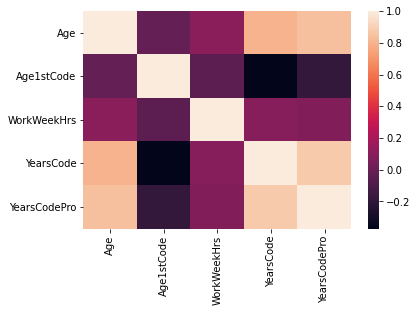

In [55]:
corr = df.select_dtypes('number').drop(columns='ConvertedComp').corr()
sns.heatmap(corr)

#### Age, YearsCode and YearsCodePro all have high correlation with each other so I will be checking their info to view the one that have the least missing values which will then guide me on which column to select in my feature matrix

## Creating my feature matrix and target variable

In [56]:
X = df[['Age1stCode', 'CollabToolsWorkedWith', 'Countries', 'DataBase', 'EdLevel', 'Employment', 'Gender_new', 
        'LangWorkedWith', 'MainBranch', 'NEWEdImpt', 'NEWLearn', 'OpSys','OrgSize', 'Tech_Worked_With', 'UndergradMajor', 
        'WorkWeekHrs', 'YearsCode', 'collabtools', 'ethnicity', 'new_dev_type', 'webframe']]
y = df['ConvertedComp']

### Splitting the dataset into train and test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

### Creating pipeline and fitting the model

In [58]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['CollabToolsWorkedWith', 'Countries',
                                     'DataBase', 'EdLevel', 'Employment',
                                     'Gender_new', 'LangWorkedWith',
                                     'MainBranch', 'NEWEdImpt', 'NEWLearn',
                                     'OpSys', 'OrgSize', 'Tech_Worked_With',
                                     'UndergradMajor', 'collabtools',
                                     'ethnicity', 'new_dev_type', 'webframe'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [59]:
model.score(X_test, y_test)

0.08114376685738256

In [60]:
predictions = model.predict(X_test)
predictions[:5]

array([ 74315.23273863, 199868.01188892, 181233.65330879,  29323.2807203 ,
        96021.63188198])

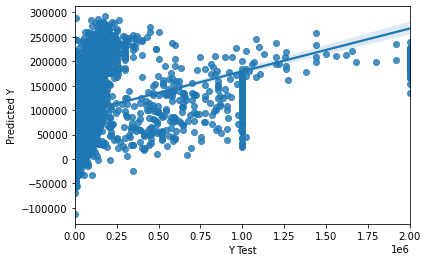

In [61]:
sns.regplot(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

## Checking Residuals

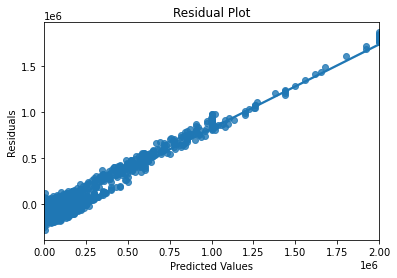

In [62]:
sns.regplot(x=y_test, y=y_test - predictions)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

In [63]:
intercept = model.named_steps['ridge'].intercept_
print('intercept value is:', intercept)

intercept value is: 54933.38340350219


In [64]:
coefficients = model.named_steps['ridge'].coef_
print('coefficient len:', len(coefficients))
coefficients[:5]

coefficient len: 160


array([  204.47994639,  3999.76875494,   557.56168217, -2255.30342864,
       -2302.02700772])

In [65]:
feature_names = model.named_steps['onehotencoder'].get_feature_names()
print('feature len:', len(feature_names))
print(feature_names[:5])

feature len: 160
['Age1stCode', 'CollabToolsWorkedWith_other collab tools', 'CollabToolsWorkedWith_Confluence', 'CollabToolsWorkedWith_Github', 'CollabToolsWorkedWith_Jira']


In [66]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

Age1stCode                                   204.479946
CollabToolsWorkedWith_other collab tools    3999.768755
CollabToolsWorkedWith_Confluence             557.561682
CollabToolsWorkedWith_Github               -2255.303429
CollabToolsWorkedWith_Jira                 -2302.027008
dtype: float64